## Pre-processing, handling missing data, outliers and splitting data set

In [11]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("MergedDataset.csv")

/home/cesare/PycharmProjects/project_432/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df.head()

,Unnamed: 0,Date,Hour,Market Demand,Ontario Demand,Ontario Demand.1,Northwest,Northeast,Ottawa,East,...,cnr1_net_rad_total,cnr1_sw_in,cnr1_sw_out,cnr1_lw_in_cor,cnr1_lw_out_cor,cnr1_lw_in_raw,cnr1_lw_out_raw,cnr1_temp_c,cnr1_temp_k,Date&Time
0,0,2004-01-01,1,15787,14703,14703,811,1406,1197,903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 01:00:00
1,1,2004-01-01,2,15194,14130,14130,805,1412,1095,889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 02:00:00
2,2,2004-01-01,3,14589,13575,13575,795,1358,1053,842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 03:00:00
3,3,2004-01-01,4,14294,13280,13280,789,1355,1027,817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 04:00:00
4,4,2004-01-01,5,14233,13219,13219,779,1354,1018,811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 05:00:00


In [8]:
# df = pd.read_csv("PUB_DemandZonal_2019.csv", parse_dates=["Date","Hour"],
                #  date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d %H"),
                #  index_col="date_time")
# The first two cells are preprocessing to get the datetime as a single unit
df = pd.read_csv("MergedDataset.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d").astype(np.str)
df["Hour"] = df["Hour"].apply(lambda x: datetime.timedelta(seconds=int(x*60*60))).astype(np.str).apply(
    lambda x: x.replace("0 days", "")
).apply(lambda x: x.replace("1 days", "")) # couldn't find a better way
df["Datetime"] = pd.to_datetime(df["Date"] + ' ' + df["Hour"])
df.head(24)

/home/cesare/PycharmProjects/project_432/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Date,Hour,Market Demand,Ontario Demand,Ontario Demand.1,Northwest,Northeast,Ottawa,East,...,cnr1_sw_in,cnr1_sw_out,cnr1_lw_in_cor,cnr1_lw_out_cor,cnr1_lw_in_raw,cnr1_lw_out_raw,cnr1_temp_c,cnr1_temp_k,Date&Time,Datetime
0,0,2004-01-01,01:00:00,15787,14703,14703,811,1406,1197,903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 01:00:00,2004-01-01 01:00:00
1,1,2004-01-01,02:00:00,15194,14130,14130,805,1412,1095,889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 02:00:00,2004-01-01 02:00:00
2,2,2004-01-01,03:00:00,14589,13575,13575,795,1358,1053,842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 03:00:00,2004-01-01 03:00:00
3,3,2004-01-01,04:00:00,14294,13280,13280,789,1355,1027,817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 04:00:00,2004-01-01 04:00:00
4,4,2004-01-01,05:00:00,14233,13219,13219,779,1354,1018,811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 05:00:00,2004-01-01 05:00:00
5,5,2004-01-01,06:00:00,14398,13354,13354,776,1351,1034,829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 06:00:00,2004-01-01 06:00:00
6,6,2004-01-01,07:00:00,14931,13462,13462,777,1339,1067,862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 07:00:00,2004-01-01 07:00:00
7,7,2004-01-01,08:00:00,14777,13538,13538,756,1334,1135,857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 08:00:00,2004-01-01 08:00:00
8,8,2004-01-01,09:00:00,14926,13675,13675,764,1347,1216,842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 09:00:00,2004-01-01 09:00:00
9,9,2004-01-01,10:00:00,15058,14234,14234,769,1379,1280,879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 10:00:00,2004-01-01 10:00:00


In [ ]:
# Preprocessing and checking
df_tor = df[["Datetime", "Toronto"]].rename(columns={"Toronto":"Demand"})
df_tor.head()
df_tor["Demand"]

0       4617
1       4437
2       4315
3       4207
4       4154
        ... 
8755    5785
8756    5560
8757    5359
8758    5138
8759    4924
Name: Demand, Length: 8760, dtype: int64

In [ ]:
# Time series with the Datetime and Demand in kWh
ts = pd.Series(data=df_tor["Demand"])
ts.index = df_tor["Datetime"]
ts.head(25)

Datetime
2019-01-01 01:00:00    4617
2019-01-01 02:00:00    4437
2019-01-01 03:00:00    4315
2019-01-01 04:00:00    4207
2019-01-01 05:00:00    4154
2019-01-01 06:00:00    4171
2019-01-01 07:00:00    4272
2019-01-01 08:00:00    4381
2019-01-01 09:00:00    4453
2019-01-01 10:00:00    4625
2019-01-01 11:00:00    4758
2019-01-01 12:00:00    4897
2019-01-01 13:00:00    5011
2019-01-01 14:00:00    5035
2019-01-01 15:00:00    5041
2019-01-01 16:00:00    5139
2019-01-01 17:00:00    5403
2019-01-01 18:00:00    5856
2019-01-01 19:00:00    5901
2019-01-01 20:00:00    5829
2019-01-01 21:00:00    5738
2019-01-01 22:00:00    5598
2019-01-01 23:00:00    5353
2019-01-01 00:00:00    5070
2019-01-02 01:00:00    4833
Name: Demand, dtype: int64

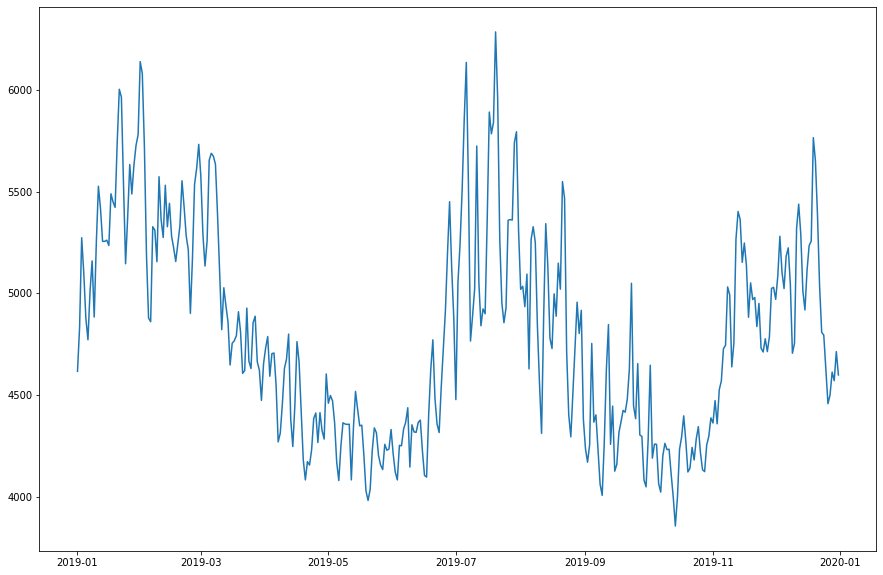

In [ ]:
# The rest is just some data visualization
plt.figure(figsize=(15,10))
plt.plot(ts[::24]);

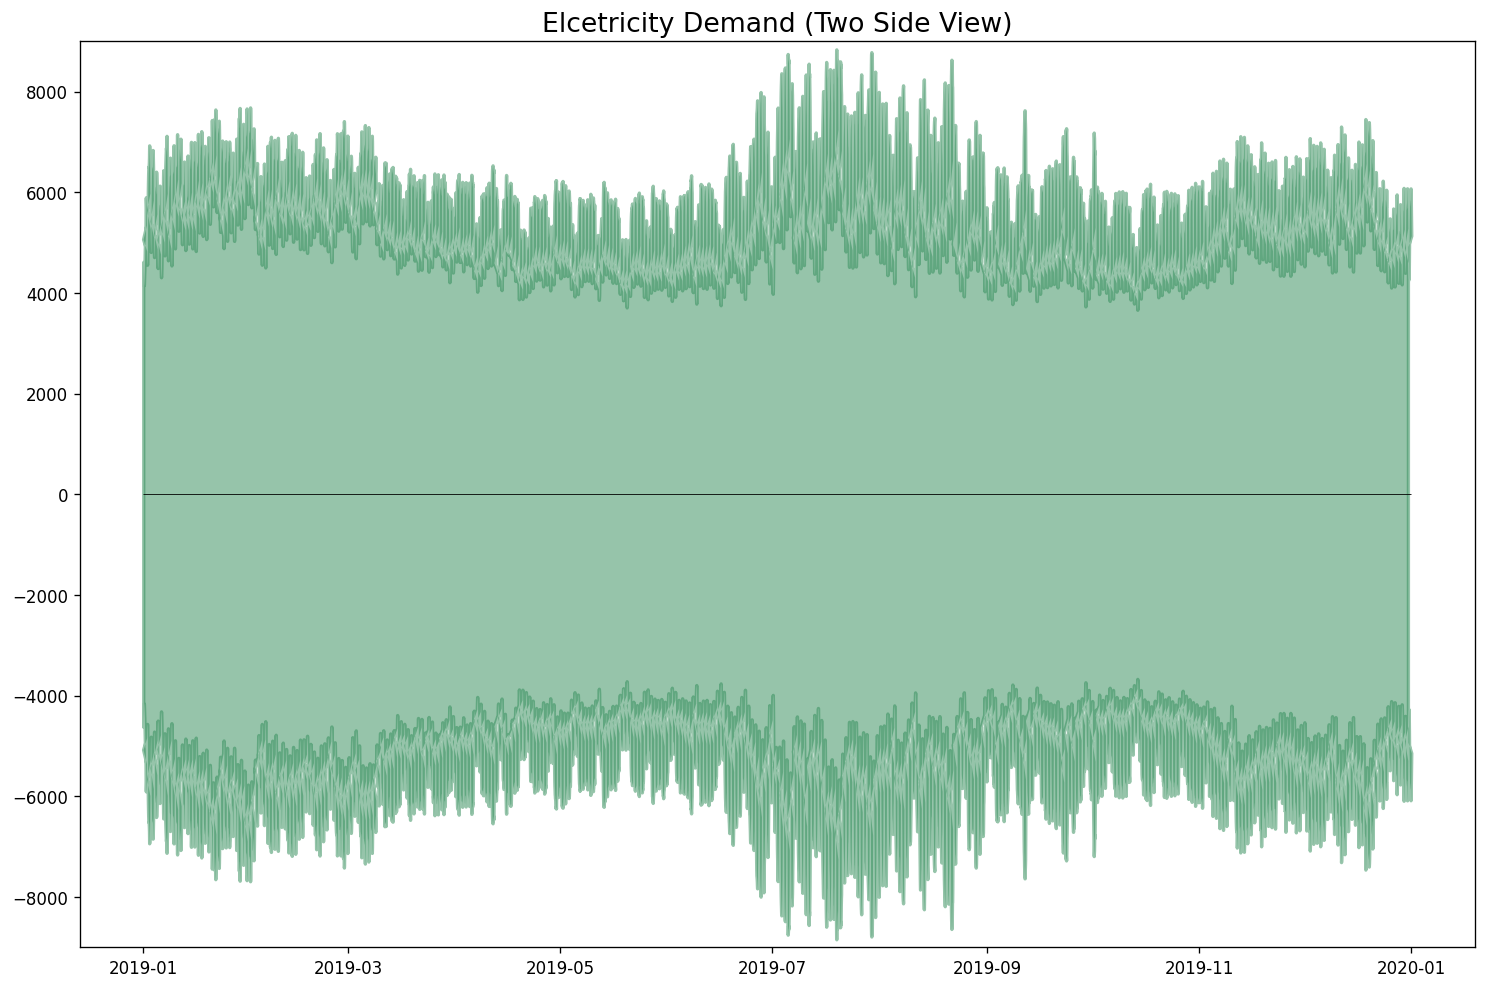

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,10), dpi= 120)
plt.fill_between(ts.index, y1=ts, y2=-ts, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-9000, 9000)
plt.title('Elcetricity Demand (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(ts.index), xmax=np.max(ts.index), linewidth=.5)
plt.show()

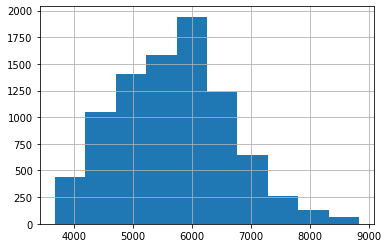

In [ ]:
ts.hist();

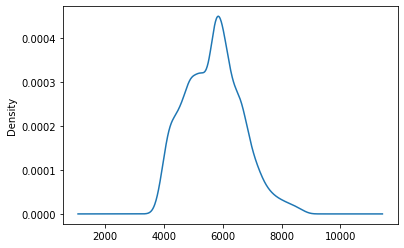

In [ ]:
ts.plot(kind='kde');

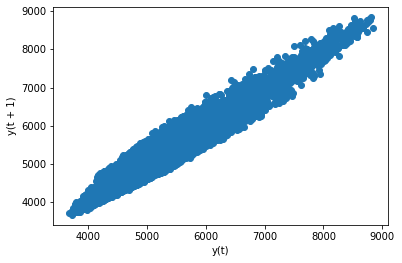

In [ ]:
pd.plotting.lag_plot(ts)

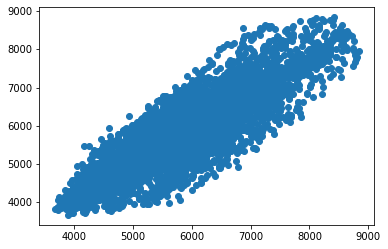

In [ ]:
plt.scatter(ts,ts.shift(24)) # plotting different lags

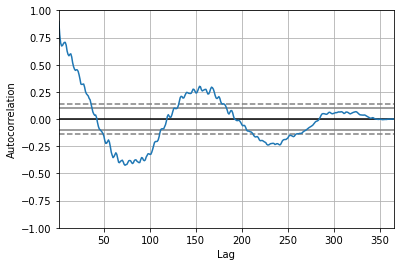

In [ ]:
pd.plotting.autocorrelation_plot(ts[::24])

In [ ]:
from statsmodels.tsa.stattools import adfuller 
adfuller(ts)[1] # p-value, reject non-stationary (this is trend stationarity)

7.328283838677025e-10

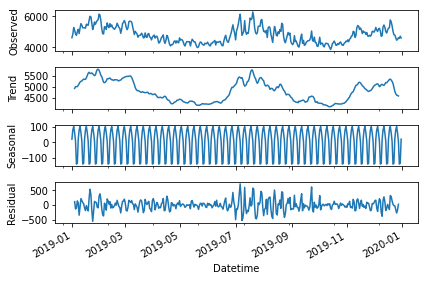

In [ ]:
# decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts[::24], model='additive')
decomp.plot();

In [ ]:
ts.head()


Datetime
2019-01-01 01:00:00    4617
2019-01-01 02:00:00    4437
2019-01-01 03:00:00    4315
2019-01-01 04:00:00    4207
2019-01-01 05:00:00    4154
Name: Demand, dtype: int64

In [ ]:
# !pip3 install pmdarima
import pmdarima as pm
model = pm.auto_arima(ts, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=24*7*26,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic


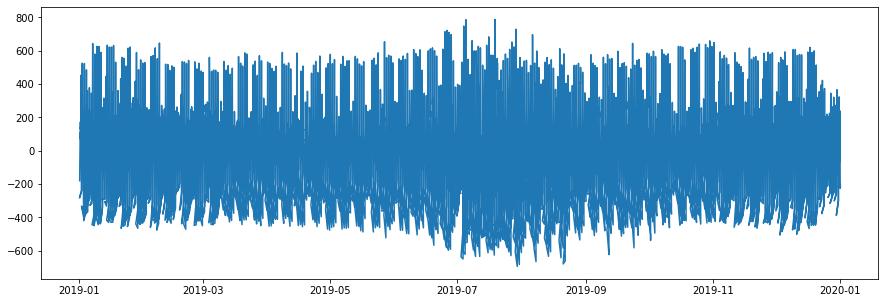

In [ ]:
# explore seasonality
plt.figure(figsize=(15,5))
plt.plot(ts.diff(1))

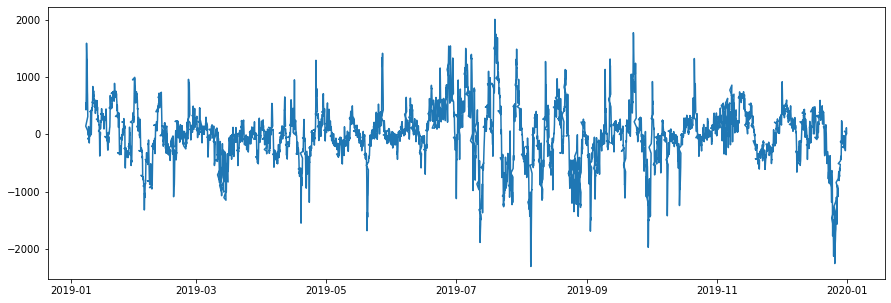

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ts.diff(7*24))

In [ ]:
df = pd.read_csv('IescoMerged.csv', low_memory=False)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d").astype(np.str)
df["Hour"] = df["Hour"].apply(lambda x: datetime.timedelta(seconds=int(x*60*60))).astype(np.str).apply(
    lambda x: x.replace("0 days", "")
).apply(lambda x: x.replace("1 days", "")) # couldn't find a better way
df["Datetime"] = pd.to_datetime(df["Date"] + ' ' + df["Hour"])


In [ ]:
df.head()

,Unnamed: 0,Date,Hour,Market Demand,Ontario Demand,Ontario Demand.1,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min,Datetime
0,0,2004-01-01,01:00:00,15787,14703,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,30.9,32.82,32.84,35.0,NaN,NaN,NaN,2004-01-01 01:00:00
1,1,2004-01-01,02:00:00,15194,14130,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,27.13,32.08,32.1,32.15,NaN,NaN,NaN,2004-01-01 02:00:00
2,2,2004-01-01,03:00:00,14589,13575,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,25.23,33.55,33.63,30.57,NaN,NaN,NaN,2004-01-01 03:00:00
3,3,2004-01-01,04:00:00,14294,13280,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,24.29,30.0,32.32,28.0,NaN,NaN,NaN,2004-01-01 04:00:00
4,4,2004-01-01,05:00:00,14233,13219,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,24.42,27.63,28.27,30.0,NaN,NaN,NaN,2004-01-01 05:00:00


In [ ]:
# Preprocessing and checking
df_tor = df[["Datetime", "Toronto"]].rename(columns={"Toronto":"Demand"})
df_tor.head()
df_tor["Demand"]

0         4606
1         4366
2         4188
3         4046
4         3974
          ... 
122731    6303
122732    6124
122733    5904
122734    5674
122735    5479
Name: Demand, Length: 122736, dtype: int64

In [ ]:
# Time series with the Datetime and Demand in kWh
ts = pd.Series(data=df_tor["Demand"])
ts.index = df_tor["Datetime"]
ts.head(25)

Datetime
2004-01-01 01:00:00    4606
2004-01-01 02:00:00    4366
2004-01-01 03:00:00    4188
2004-01-01 04:00:00    4046
2004-01-01 05:00:00    3974
2004-01-01 06:00:00    3966
2004-01-01 07:00:00    4023
2004-01-01 08:00:00    4082
2004-01-01 09:00:00    4112
2004-01-01 10:00:00    4301
2004-01-01 11:00:00    4496
2004-01-01 12:00:00    4688
2004-01-01 13:00:00    4795
2004-01-01 14:00:00    4796
2004-01-01 15:00:00    4719
2004-01-01 16:00:00    4819
2004-01-01 17:00:00    5053
2004-01-01 18:00:00    5500
2004-01-01 19:00:00    5528
2004-01-01 20:00:00    5441
2004-01-01 21:00:00    5339
2004-01-01 22:00:00    5193
2004-01-01 23:00:00    4962
2004-01-01 00:00:00    4644
2004-01-02 01:00:00    4331
Name: Demand, dtype: int64

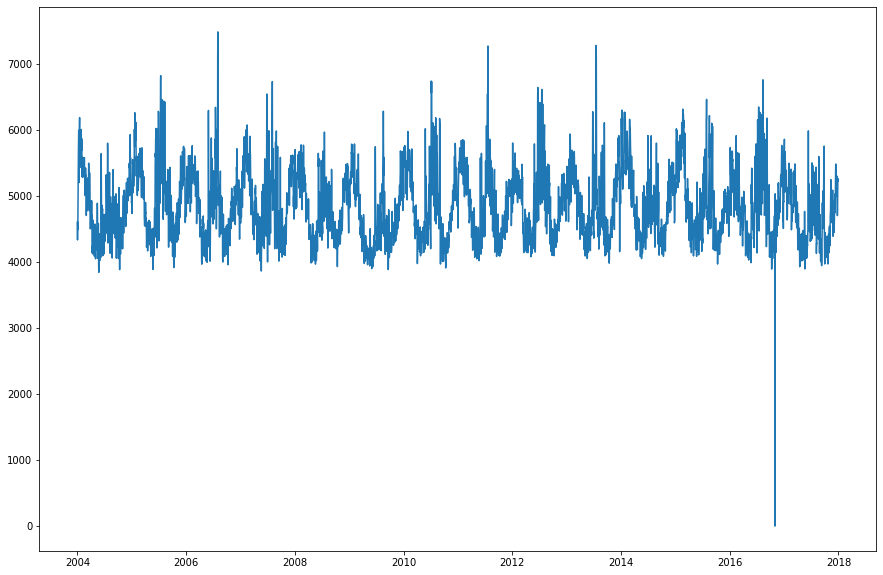

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(ts[::24]);

(array([3.5000e+01, 0.0000e+00, 1.0000e+00, 3.4790e+03, 3.1961e+04,
        3.8584e+04, 3.8097e+04, 8.4760e+03, 1.7990e+03, 3.0400e+02]),
 array([    0. ,  1028.5,  2057. ,  3085.5,  4114. ,  5142.5,  6171. ,
         7199.5,  8228. ,  9256.5, 10285. ]),
 <a list of 10 Patch objects>)

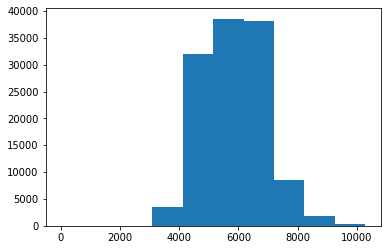